In [7]:
from youtube_api import *
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000)
pd.set_option('display.max_columns', 60)

In [8]:
def normalize_videos_data(videos):
    categories = get_categories()

    for video in videos:
        category_id = video['categoryId']
        category_name = categories[category_id]
        video['categoryName'] = category_name

    return videos

In [9]:
before_covid_videos = read_data_from_file('before_covid_videos_amerika.txt')
simplified_before_covid_videos = simplify_videos_data(before_covid_videos, required_properties)
simplified_before_covid_videos = normalize_videos_data(simplified_before_covid_videos)

after_covid_videos = read_data_from_file('after_covid_videos_amerika.txt')
simplified_after_covid_videos = simplify_videos_data(after_covid_videos, required_properties)
simplified_after_covid_videos = normalize_videos_data(simplified_after_covid_videos)

In [10]:
before = pd.DataFrame(simplified_before_covid_videos)
after = pd.DataFrame(simplified_after_covid_videos)
after['publishedAt'] = pd.to_datetime(after['publishedAt'])
before['publishedAt'] = pd.to_datetime(before['publishedAt'])
after = after.sort_values('publishedAt', ascending=True)
before = before.sort_values('publishedAt', ascending=True)
after_like_count = after.copy()
before_like_count = before.copy()
after_view_count = after.copy()
before_view_count = before.copy()
after_comment_count = after.copy()
before_comment_count = before.copy()
after_dislike_count = after.copy()
before_dislike_count = before.copy()


<AxesSubplot:>

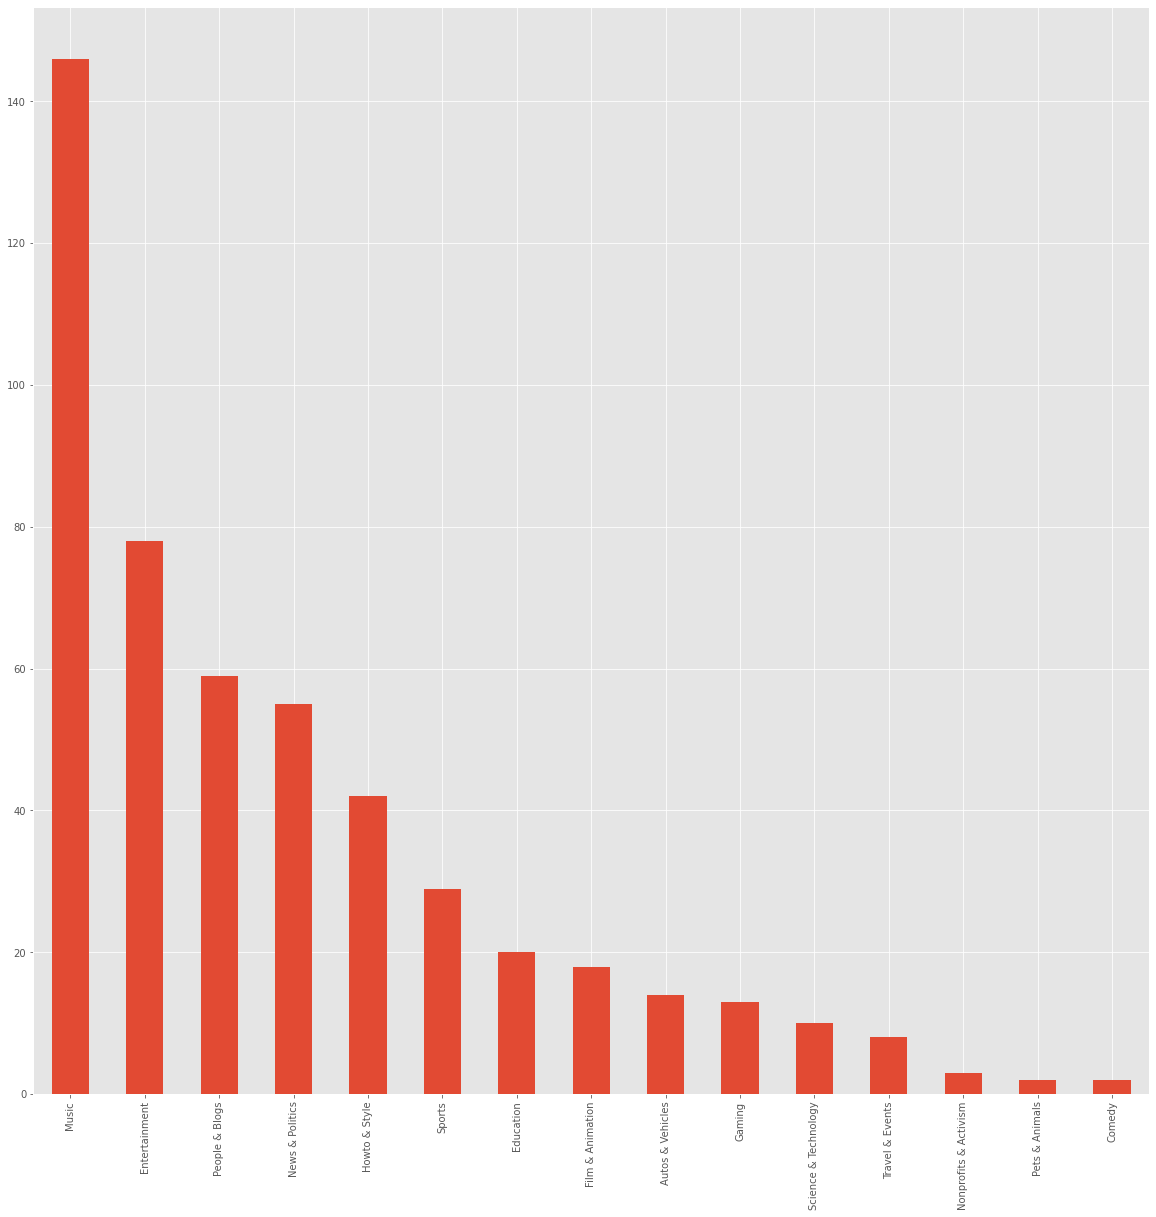

In [11]:
category_count = after.groupby('categoryName').count()
category_count_before = before.groupby('categoryName').aggregate(sum)

category_count = after['categoryName'].value_counts()
category_count_before = before['categoryName'].value_counts()

plt.figure(figsize=(20,20))

category_count.plot(kind='bar')

<AxesSubplot:>

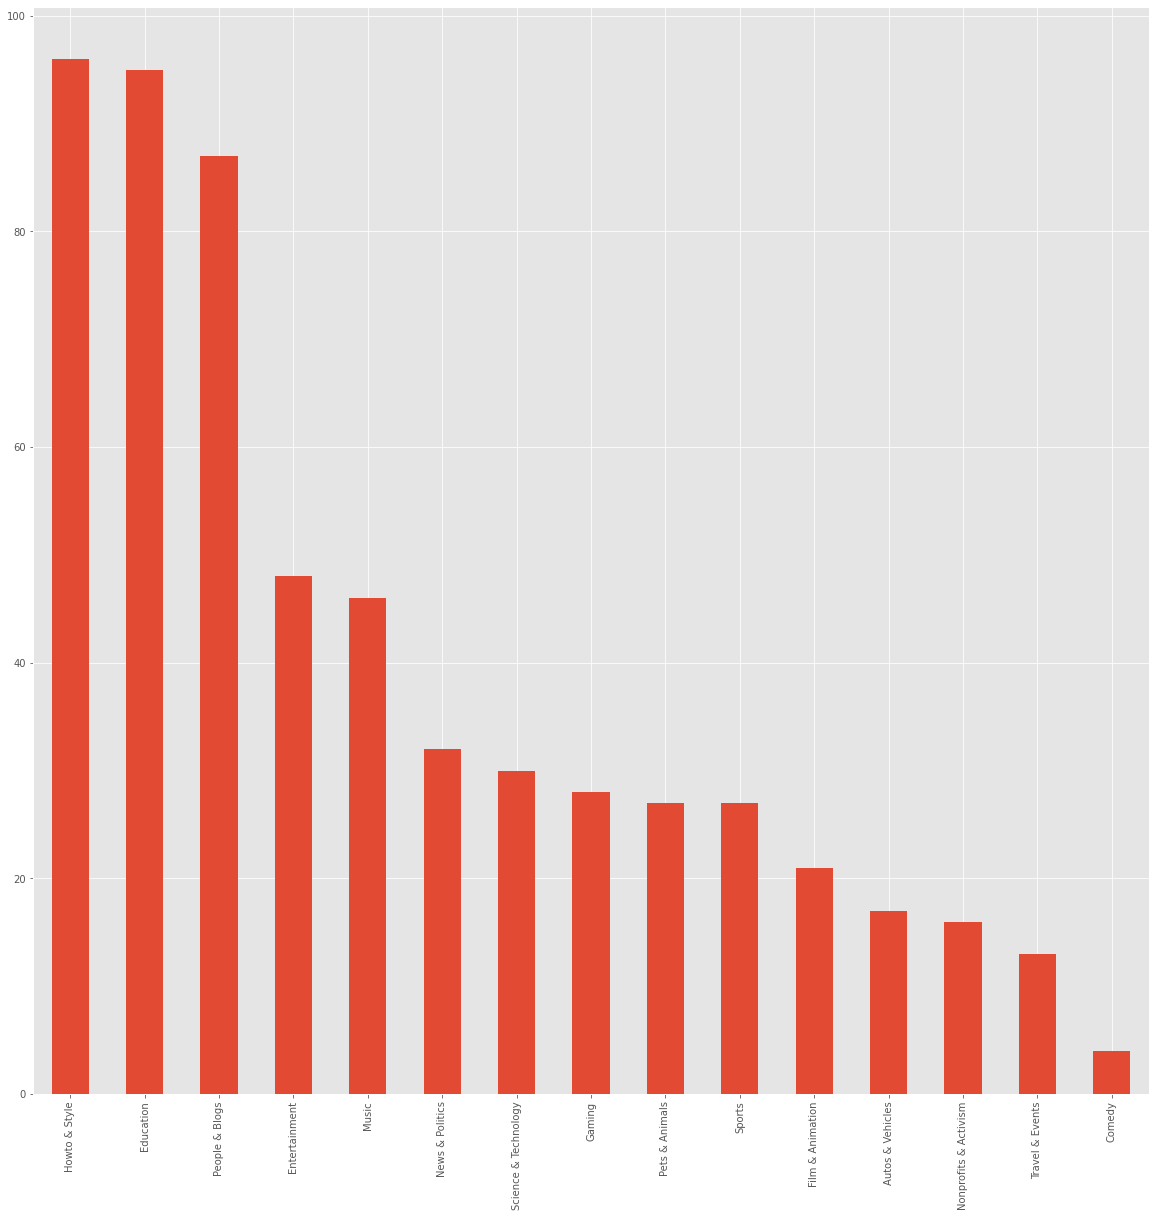

In [12]:
plt.figure(figsize=(20,20))
category_count_before.plot(kind='bar')

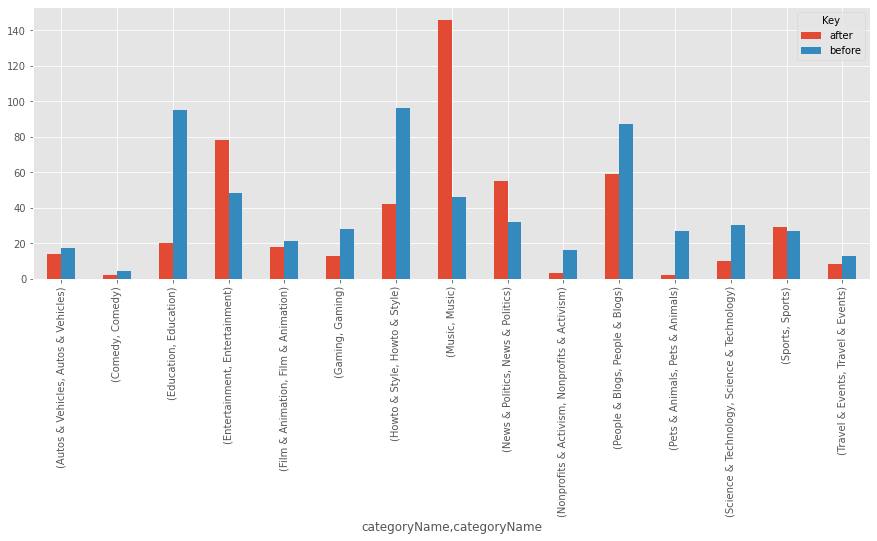

In [13]:
# compare categor
before['Key'] = 'before'
after['Key'] = 'after'

DF = pd.concat([before,after],keys=['before','after'])

DFGroup = DF.groupby(['categoryName','Key'])
DFGroup['categoryName'].value_counts()

DFGPlot = DFGroup['categoryName'].value_counts().unstack('Key').plot(kind='bar')

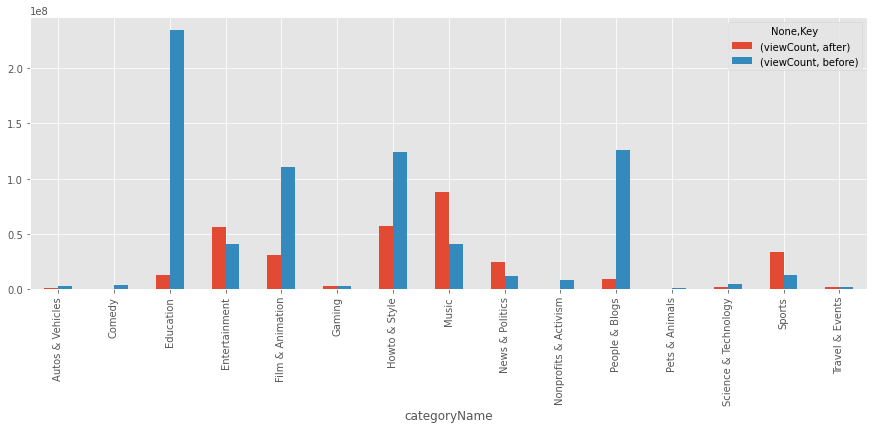

In [14]:
# compare category count according to viewcount
before_view_count['Key'] = 'before'
after_view_count['Key'] = 'after'
before_view_count['viewCount'] = pd.to_numeric(before_view_count['viewCount'])
after_view_count['viewCount'] = pd.to_numeric(after_view_count['viewCount'])

DF = pd.concat([before_view_count,after_view_count],keys=['before','after'])

DFGroup = DF.groupby(['categoryName','Key'])

DFGPlot = DFGroup.sum().unstack('Key').plot(kind='bar')

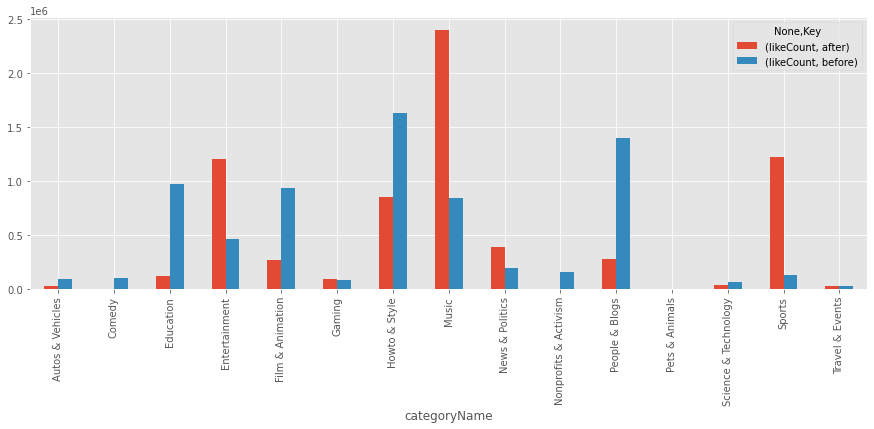

In [15]:
# compare category count according to viewcount
before_like_count['Key'] = 'before'
after_like_count['Key'] = 'after'
before_like_count['likeCount'] = pd.to_numeric(before_like_count['likeCount'])
after_like_count['likeCount'] = pd.to_numeric(after_like_count['likeCount'])

DF = pd.concat([before_like_count, after_like_count],keys=['before','after'])

DFGroup = DF.groupby(['categoryName','Key'])

DFGPlot = DFGroup.sum().unstack('Key').plot(kind='bar')

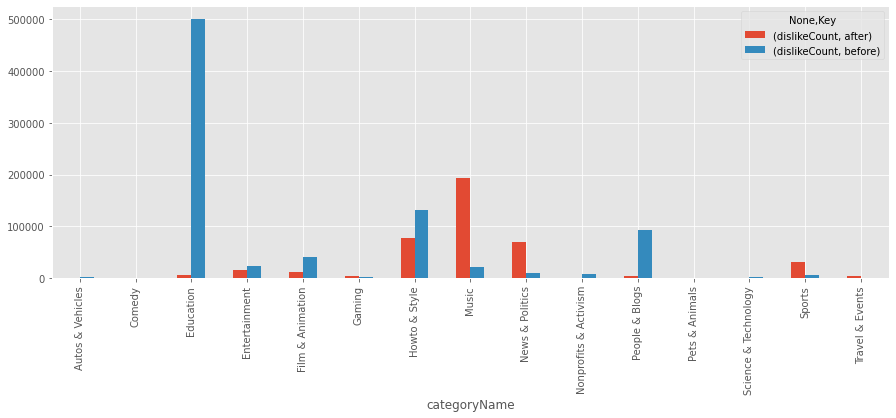

In [16]:
before_dislike_count['Key'] = 'before'
after_dislike_count['Key'] = 'after'
before_dislike_count['dislikeCount'] = pd.to_numeric(before_dislike_count['dislikeCount'])
after_dislike_count['dislikeCount'] = pd.to_numeric(after_dislike_count['dislikeCount'])

DF = pd.concat([before_dislike_count, after_dislike_count],keys=['before','after'])

DFGroup = DF.groupby(['categoryName','Key'])

DFGPlot = DFGroup.sum().unstack('Key').plot(kind='bar')

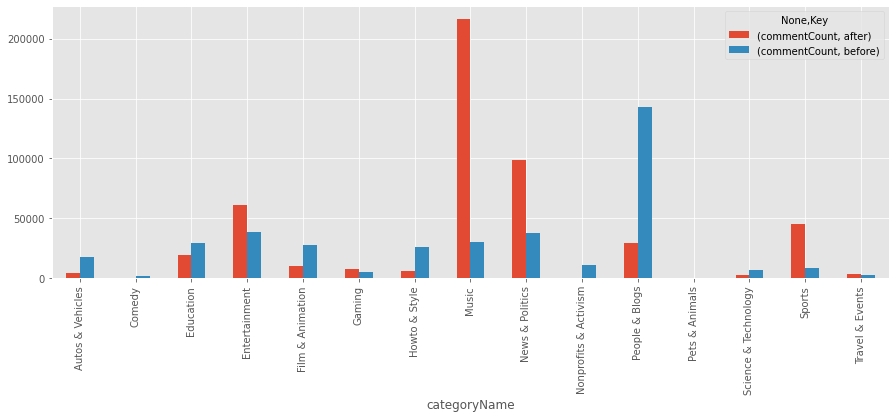

In [17]:
before_comment_count['Key'] = 'before'
after_comment_count['Key'] = 'after'
before_comment_count['commentCount'] = pd.to_numeric(before_comment_count['commentCount'])
after_comment_count['commentCount'] = pd.to_numeric(after_comment_count['commentCount'])

DF = pd.concat([before_comment_count, after_comment_count],keys=['before','after'])

DFGroup = DF.groupby(['categoryName','Key'])

DFGPlot = DFGroup.sum().unstack('Key').plot(kind='bar')